In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline 


### <span style='background :yellow' > Central Limit Theorem (CLT): </span>
1. distribution of sample means is normal
2. average of sample means is equal of average of general totality
3. standart error of mean:
$$
se = \frac{\sigma}{\sqrt{n}}\
$$
where $\sigma$ - standart deviation of general totality  
if n > 30, then:
$$
se = \frac{sd}{\sqrt{n}}\
$$
where sd - standart deviation of sample

#### <span style='background :aqua)' >it is of importance: </span>
*in case of increasing sample size and quantity of smaples distribution of sample means will be normal*  
*(even if general totality is not normal)*  
https://gallery.shinyapps.io/CLT_mean/  


### <span style='background :yellow' > Step 1 </span>
*make a general totality with normal distribution*

In [3]:
mu, sigma = 100, 10 # mean and standard deviation
population = np.random.normal(mu, sigma, 10000).round(2)
np.mean(population) # calculate mean

100.07776199999999

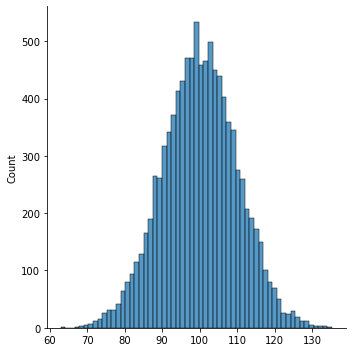

In [4]:
sns.displot(population, kde = False)


### <span style='background :yellow' > Step 2 </span>
*create 1000 samples and collect means of samples*

In [5]:
sample_size = 30
sample_mean=[]
n = 1000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean.append(sample.mean())

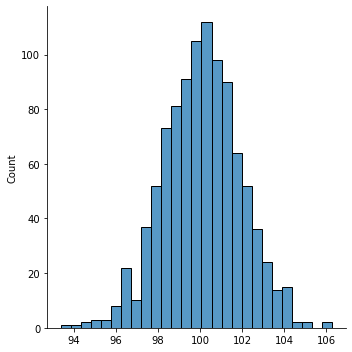

In [6]:
sns.displot(sample_mean, kde = False)

### <span style='background :yellow' > Step 3 </span>

*Reality*  
*We have only one sample*


In [7]:
sample_real = np.random.choice(population, sample_size, False)
sample_real

array([120.22, 111.54, 108.58, 110.73,  92.61,  87.02, 110.5 , 114.23,
       102.69, 109.24,  81.86,  99.06,  95.82, 109.31,  85.12, 114.55,
        93.55, 100.37, 104.94, 110.26, 114.74,  85.89,  97.1 , 104.7 ,
       101.3 , 103.14,  90.97, 108.75,  86.27,  88.72])

In [8]:
se = sample_real.std()/(sample_size**0.5)

*define confidence interval*

In [9]:
sample_real.mean() + 1.96 * se

105.19318448313363

In [10]:
sample_real.mean() - 1.96 * se

97.725482183533

In [11]:
# therefore, mean of general totality:
population.mean()

100.07776199999999

In [12]:
# smaple mean
sample_real.mean()

101.45933333333332

*confidence interval of sample includes mean of general totality*

### <span style='background :yellow' > P.S.(1) </span>
*python function for confidence interval*

In [13]:
import scipy.stats as st
import statsmodels.stats.api as sms

In [14]:
st.t.interval(0.95, len(sample_real)-1, loc=np.mean(sample_real), scale=st.sem(sample_real))

(97.49651068600708, 105.42215598065955)

In [15]:
sms.DescrStatsW(sample_real).tconfint_mean()

(97.49651068600708, 105.42215598065955)

### <span style='background :yellow' > P.S. (2) </span>
*p-value - probability to get the same or more extremal value of statistic in case of null hipotesis is true*  
*calculation p-value:*  
https://gallery.shinyapps.io/dist_calc/

#### <span style='background :aqua)' >it is of importance: </span>
- p-value does not show the power of effect  
- if we got p-value higher then threshold it does not mean that null hipotesis is true. It's just that this significance level prevents us from rejecting it